# Week 11 IT Class Ordinary Differential Equations

## Question 1

We have the ODE:

$$\frac{dy}{dt}=y$$

subject to the initial condition $y(0)=1$.

(a)	Use the midpoint method and Python to calculate $y(1)$, with different time steps $h = 0.2, 0.05, 0.01, 0.002$.

(b)	Plot the difference between the exact value of $y(1)$ and the numerical approximation as a function $h$. 

(c)	With $h=0.2$, use the Euler and midpoint methods to calculate the time evolutions of $y$ and compare the results with the analytical solution in a plot.


### Answer

The iteration formula for the midpoint can be written as:
$$y_{n+1} = y_{n}+h*f(t_{n+\frac{1}{2}},y_{n+\frac{1}{2}}).$$
Where $t_{n+\frac{1}{2}}$ and $y_{n+\frac{1}{2}}$ are midpoints, can be represents as following:
$$t_{n+\frac{1}{2}} = t_{n}+\frac{h}{2},$$
$$y_{n+\frac{1}{2}} = y_{n}+\frac{h}{2}*f(t_n,y_n).$$
And for this problem, $f(t_{n},y_{n}) = y_{n}$.

Based on these hints, please fill the code section below

In [2]:
import numpy as np
import math

h = 0.20                # You can change h here, h=0.2,0.05,0.01,0.002
nsteps = math.floor(1/h)# Number of iterations for t=1 with the time step h
f = lambda t , y : y    # Defination of the function f(t,y)=y
y = 1                   # Initial value. y(t=0)=1.
t = 0                   # start from t=0
for i in range(nsteps):
    t_mid = t + h/2               # midpoint of t: t_n+1/2=t_n+h/2
    y_mid = y + h/2 * f(t,y)      # midpoint of y: y_n+1/2=y_n+h/2*f(t_n,y_n)
    y = (y + h * f(t_mid, y_mid)) # iteration with the midpoint method: y_n+1=y_n+h*f(y_n+1/2,t_n+1/2).
    t = t + h                     # Update of current time

print(f'Using the midpoint method with h =', h, 'y(1) =', y)

diff = abs(y - math.exp(1))       # Error of the numerical solution.
print(f'The difference between the numerical and analytical solutions is', diff)


Using the midpoint method with h = 0.2 y(1) = 2.7027081632
The difference between the numerical and analytical solutions is 0.015573665259045022


<b>(b)</b> Fill the two arrays <b>hs</b> and <b>diffs</b> in the code sectiin below using the result from previous section.

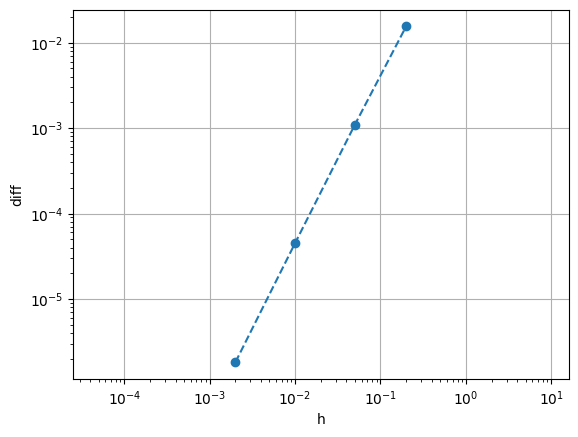

In [3]:
import matplotlib.pyplot as plt

# Please calculate difference between analytical solution and nuemrical solution using previous code section.
hs=[0.002,0.01,0.05,0.2]       #h values
diffs=[1.80947117e-06,4.49658991e-05,0.00109077410,0.015573665259]       #Difference between numerical and analytical solution

# Plot time step vs error in dual log scale.
plt.plot(hs,diffs,'--o')
plt.xlabel('h')
plt.ylabel('diff')
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.grid()
plt.show()

<b>(c)</b> We need to use arrays to store the time evolutions of $y$. 

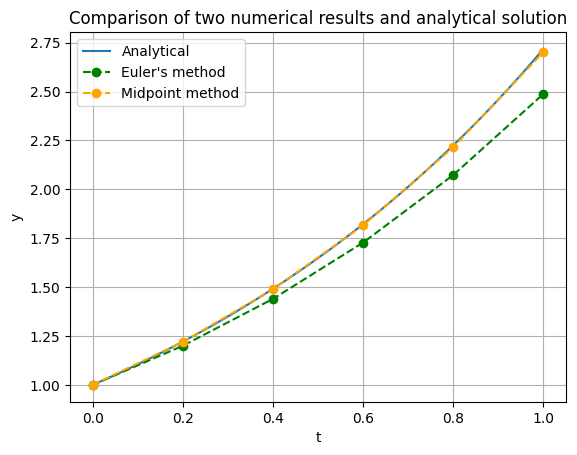

In [5]:
#analytical solution 
h = 0.02
nsteps = math.floor(1/h)       # Number of iterations, 1s.
t_a = np.zeros(nsteps+1)       # Initialize zero arrays to store time evolution history.
y_a = np.zeros(nsteps+1)       # You can also use Python list for same purpose
t_a[0] = 0                     # Initial value. T(t=0)=100.
y_a[0] = 1
for i in range(nsteps):        # Analytical solution loop
    t_a[i+1] = t_a[i] + h      # Update time poinr first, so we can calculate analytical results for next time point.
    y_a[i+1] = math.exp(t_a[i+1]) # Analytical solution: y(t) = e ^ (t)

#numerical solution with Euler's method    
h = 0.2
nsteps = math.floor(1/h) 
t_e = np.zeros(nsteps+1)
y_e = np.zeros(nsteps+1)
t_e[0] = 0
y_e[0] = 1
for i in range(nsteps):        # Euler's method solution loop
    y_e[i+1] = y_e[i] + h * f(t_e[i],y_e[i])    # Euler iteration step, array implementation. yn+1 = yn + h * f(yn,tn).
    t_e[i+1] = t_e[i] + h                       # Update time t.

#numerical solution with midpoint method
t_m = np.zeros(nsteps+1)
y_m = np.zeros(nsteps+1)
t_m[0] = 0
y_m[0] = 1
for i in range(nsteps):        # Midpoint method solution loop
    t_mid = t_m[i] + h/2                        # Midpoint tn+1/2 = tn + h / 2
    y_mid = y_m[i] + h / 2 * f(t_m[i], y_m[i])  # Midpoint yn+1/2 = yn + h / 2 * f(tn+1/2 , yn+1/2)
    y_m[i+1] = y_m[i] + h * f(t_mid, y_mid)     # yn+1 = yn + h * f(tn+1/2 , yn+1/2)
    t_m[i+1] = t_m[i] + h                       # Update time t.

# Plot t-y diagram of all three methods in the same plot to see the difference.
plt.plot(t_a,y_a,label='Analytical')
plt.plot(t_e,y_e,'--o',color='g',label='Euler\'s method')
plt.plot(t_m,y_m,'--o',color='orange',label='Midpoint method')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of two numerical results and analytical solution')
plt.grid()
plt.legend()
plt.show()

## Question 2

Edward Lorenz proposed a system of ODEs as a simple model of atmospheric convection to predict weather. Lorenz attractor is a specific set of equations of the Lorenz system, that shows chaotic behavior

$$\frac{dx}{dt} = 10(y-x)$$

$$\frac{dy}{dt} = x(27-z)-y$$

$$\frac{dz}{dt} = xy-\frac{8}{3}z$$

(a) Assume at $t = 0$, $(x,y,z) = (1,0,0)$, use the midpoint and $h = 0.01$ to calculate the history of $x$ till $t = 30$, plot $x$ vs $t$, and $x$ vs $z$

(b) Repeat (a) for a different initial condition with $(x,y,z) = (1,0.01,0.01)$, compare the histories of $x$ for the two initial conditions

(c) Change the constant in equation (2) from $27$ to $20$, repeat step (a), and compare the $x$ vs $z$ plots


<b>(a)</b> Please fill the code lines using comments

In [ ]:
### Your code Here ###


# Defination of the Lorenz equation
### Fill the following three lines
fx =
fy =
fz =


h = 0.01                        # Setting up time step
nsteps = math.floor(30/h)       # Number of iterations, 30s.


# Initialize zero arrays for evolution history of x, y, z with t.
### Fill the following four lines
x = 
y = 
z = 
t = 

# Initial value for this problem x(0) = 1, y(0) = 0, z(0) = 0
x[0] = 1
y[0] = 0
z[0] = 0
t[0] = 0

### Fill the midpoint solution loop.
### You can calculate x,y,z seperately using midpoint method, then update t.
for i in range(nsteps):
    ### Your code here###
    
    
    
    
    

Now we plot your results.

In [ ]:
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [ ]:
plt.plot(x,z)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

<b>(b)</b> Now copy the code you just wrote, changing the initial values, and calculae new results. Don't forget rename variables since we need to compare this and previous one. I recommend use x1,y1,z1 and t1 for this.

In [ ]:
# Create empty arrays and initialize the first variable using initial condition(1,0.01,0.01,0).
### Your code here###






# Loop using midpoint method.
for i in range(nsteps):
    ### Your code here###
    
    
    
    
    


Let's plot and compare. Note you may need change variable names below if you didn't use recommend variable names.

In [ ]:
plt.plot(t,x,label='Initial value (1,0,0)')
plt.plot(t1,x1,label='Initial value (1,0.01,0.01)')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [ ]:
plt.plot(x,z,label='Initial value (1,0,0)')
plt.plot(x1,z1,label='Initial value (1,0.01,0.01)')
plt.legend()
plt.xlabel('x')
plt.ylabel('z')
plt.show()

<b>(c)</b> We reload the Lorenz equations with different parameters, and use midpoint method to solve them at initial condition of $x(0) = 1, y(0) = 0, z(0) = 0$. Don't forget rename variables since we need to compare this and previous one. I recommend use x2,y2,z2 and t2 for this.

In [ ]:
# Copy the defination of fx, fy and fz, change function parameters







# Create empty arrays and initialize the first variable using initial condition(1,0,0,0).







# Loop using midpoint method.
for i in range(nsteps):
    
    
    
    
    
    
    

Finally we plot the difference of x vs z under these two parameter sets.

In [ ]:
plt.plot(x,z,label='Equation parameter 27')
plt.plot(x2,z2,label='Equation parameter 20')
plt.xlabel('x')
plt.ylabel('z')
plt.show()